In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')
import copy as cp

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")

print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc   = 1000000
print "Load the mc dataframe"
qr_mc1.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
qr_mc2.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
#-------------------------------------------------------------

startEvtdata = 0
stopEvtdata   = 1000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016H[1])
dfdata = qr_data.getDF()

Load the mc dataframe
Load the mc dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  1000000 ]  out of  11554791
DataFrame size =  1000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIe

In [5]:
import pandas as pd
# quick PU correction
dfmc=qr_mc1.df
dfmcA=qr_mc2.df
runPeriod=[272006,276812,277420,278810,280386,284046]
dfdata['runperiod'] = np.digitize(dfdata['run'],runPeriod)
#create fake runperiod for mc.
#Assign weighted runperiod to MC
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
vecPeriod=vecPeriod/float(vecPeriod.sum())
period=np.array([0,
                 vecPeriod[0],
                 vecPeriod[0]+vecPeriod[1],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3]+vecPeriod[4]+0.1])

dfmc["runperiod"]=np.digitize(np.random.rand(len(dfmc.index)),period)
dfmcA["runperiod"]=np.digitize(np.random.rand(len(dfmcA.index)),period)
dfdata1   = dfdata  .query('runperiod==1').reset_index()  
dfdata2   = dfdata  .query('runperiod==2').reset_index()  
dfdata3   = dfdata  .query('runperiod==3').reset_index()  
dfdata4   = dfdata  .query('runperiod==4').reset_index()  
dfdata5   = dfdata  .query('runperiod==5').reset_index() 
dfmc1   = dfmc  .query('runperiod==1').reset_index()  
dfmc2   = dfmc  .query('runperiod==2').reset_index()  
dfmc3   = dfmc  .query('runperiod==3').reset_index()  
dfmc4   = dfmc  .query('runperiod==4').reset_index()  
dfmc5   = dfmc  .query('runperiod==5').reset_index()
dfmcA1   = dfmcA  .query('runperiod==1').reset_index()  
dfmcA2   = dfmcA  .query('runperiod==2').reset_index()  
dfmcA3   = dfmcA  .query('runperiod==3').reset_index()  
dfmcA4   = dfmcA  .query('runperiod==4').reset_index()  
dfmcA5   = dfmcA  .query('runperiod==5').reset_index()
rv=np.arange(0,40,0.4)

ratiomc1,edge,ratiodataErrG= plot.getHistRatio(dfdata1.loc[:,"rho"],dfmc1.loc[:,"rho"],rv,Weight2=dfmc1["weight"])
ratiomc2,edge,ratiodataErrG= plot.getHistRatio(dfdata2.loc[:,"rho"],dfmc2.loc[:,"rho"],rv,Weight2=dfmc2["weight"])
ratiomc3,edge,ratiodataErrG= plot.getHistRatio(dfdata3.loc[:,"rho"],dfmc3.loc[:,"rho"],rv,Weight2=dfmc3["weight"])
ratiomc4,edge,ratiodataErrG= plot.getHistRatio(dfdata4.loc[:,"rho"],dfmc4.loc[:,"rho"],rv,Weight2=dfmc4["weight"])
ratiomc5,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv,Weight2=dfmc5["weight"])
ratiomcA1,edge,ratiodataErrG= plot.getHistRatio(dfdata1.loc[:,"rho"],dfmcA1.loc[:,"rho"],rv,Weight2=dfmcA1["weight"])
ratiomcA2,edge,ratiodataErrG= plot.getHistRatio(dfdata2.loc[:,"rho"],dfmcA2.loc[:,"rho"],rv,Weight2=dfmcA2["weight"])
ratiomcA3,edge,ratiodataErrG= plot.getHistRatio(dfdata3.loc[:,"rho"],dfmcA3.loc[:,"rho"],rv,Weight2=dfmcA3["weight"])
ratiomcA4,edge,ratiodataErrG= plot.getHistRatio(dfdata4.loc[:,"rho"],dfmcA4.loc[:,"rho"],rv,Weight2=dfmcA4["weight"])
ratiomcA5,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmcA5.loc[:,"rho"],rv,Weight2=dfmcA5["weight"])

dfmc1['bin'] = np.digitize(dfmc1['rho'],edge)
dfmc1["weight"]=dfmc1["weight"]*ratiomc1[dfmc1['bin'].values-1]

dfmc2['bin'] = np.digitize(dfmc2['rho'],edge)
dfmc2["weight"]=dfmc2["weight"]*ratiomc2[dfmc2['bin'].values-1]

dfmc3['bin'] = np.digitize(dfmc3['rho'],edge)
dfmc3["weight"]=dfmc3["weight"]*ratiomc3[dfmc3['bin'].values-1]

dfmc4['bin'] = np.digitize(dfmc4['rho'],edge)
dfmc4["weight"]=dfmc4["weight"]*ratiomc4[dfmc4['bin'].values-1]

dfmc5['bin'] = np.digitize(dfmc5['rho'],edge)
dfmc5["weight"]=dfmc5["weight"]*ratiomc5[dfmc5['bin'].values-1]
dfmcA1['bin'] = np.digitize(dfmcA1['rho'],edge)
dfmcA1["weight"]=dfmcA1["weight"]*ratiomcA1[dfmcA1['bin'].values-1]

dfmcA2['bin'] = np.digitize(dfmcA2['rho'],edge)
dfmcA2["weight"]=dfmcA2["weight"]*ratiomcA2[dfmcA2['bin'].values-1]

dfmcA3['bin'] = np.digitize(dfmcA3['rho'],edge)
dfmcA3["weight"]=dfmcA3["weight"]*ratiomcA3[dfmcA3['bin'].values-1]

dfmcA4['bin'] = np.digitize(dfmcA4['rho'],edge)
dfmcA4["weight"]=dfmcA4["weight"]*ratiomcA4[dfmcA4['bin'].values-1]

dfmcA5['bin'] = np.digitize(dfmcA5['rho'],edge)
dfmcA5["weight"]=dfmcA5["weight"]*ratiomcA5[dfmcA5['bin'].values-1]

#cut some infinities:

dfmc1=dfmc1.query("weight<1000")
dfmc2=dfmc2.query("weight<1000")
dfmc3=dfmc3.query("weight<1000")
dfmc4=dfmc4.query("weight<1000")
dfmc5=dfmc5.query("weight<1000")
dfmcA1=dfmcA1.query("weight<1000")
dfmcA2=dfmcA2.query("weight<1000")
dfmcA3=dfmcA3.query("weight<1000")
dfmcA4=dfmcA4.query("weight<1000")
dfmcA5=dfmcA5.query("weight<1000")

frame1 = [dfmc1, dfmc2, dfmc3, dfmc4,dfmc5]
dfmc = pd.concat(frame1).sample(frac=1).reset_index(drop=True) 
print len(dfdata.index),len(dfmc.index)
qr_mc1.df= dfmc
frame1 = [dfmcA1, dfmcA2, dfmcA3, dfmcA4,dfmcA5]
dfmcA = pd.concat(frame1).sample(frac=1).reset_index(drop=True) 
print len(dfdata.index),len(dfmcA.index)
qr_mc2.df= dfmcA


1000000 1000000
1000000 1000000


In [6]:
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
print vecPeriod

[361746 108772  83696 210354 235432]


In [7]:
qr_mc1.correctAllParallel(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_Parallel_",n_jobs=20) 
qr_mc2.correctAllParallel(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_Parallel_",n_jobs=20) 

Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_1_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.5s remaining:    8.3s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.9s remaining:    5.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.1s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.6s remaining:    3.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.4s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.6s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.5s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.7s remaining:    9.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    2.2s remaining:    6.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.4s remaining:    4.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.1s remaining:    2.6s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.6s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    4.0s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.4s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.9s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.4s remaining:    7.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.8s remaining:    5.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.1s remaining:    4.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.4s remaining:    2.9s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.8s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.2s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.5s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.4s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.5s remaining:    8.4s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.8s remaining:    5.4s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.2s remaining:    4.2s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.6s remaining:    3.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.4s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.1s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.6s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.5s remaining:    8.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.8s remaining:    5.4s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.2s remaining:    4.1s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.6s remaining:    3.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.4s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.5s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.5s remaining:    8.4s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    2.0s remaining:    5.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.3s remaining:    4.3s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.7s remaining:    3.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.4s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.6s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EB
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_1/data_weights_EB
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.4s remaining:    7.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.8s remaining:    5.4s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.2s remaining:    4.1s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.5s remaining:    3.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    3.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.3s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.6s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    4.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.5s finished


Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_2_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.0s remaining:    5.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.8s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.7s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.0s remaining:    5.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.8s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.4s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.8s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.5s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.9s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.0s remaining:    5.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.4s remaining:    4.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.7s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.1s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EB
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_2/data_weights_EB
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.4s remaining:    4.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.7s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_3_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.8s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.4s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.7s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.8s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.9s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.9s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.7s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.4s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.7s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.5s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EB
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_3/data_weights_EB
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_4_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.1s remaining:    6.2s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.2s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.8s remaining:    3.4s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.2s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.2s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.1s remaining:    6.3s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.2s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.1s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.1s remaining:    6.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.5s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EB
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_4/data_weights_EB
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.1s remaining:    6.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.7s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.1s finished


Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_5_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    7.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.1s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    7.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.0s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.4s remaining:    2.9s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.7s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.8s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.3s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    2.0s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.3s remaining:    2.9s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.7s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.5s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.8s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.3s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.4s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.9s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.2s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.6s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.3s remaining:    2.8s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.7s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.7s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.2s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EB
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_5/data_weights_EB
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    1.2s remaining:    6.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.9s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.4s remaining:    1.1s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.7s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.1s finished


Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_1_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  S4
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.3s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.7s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    4.0s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_1/mc_weights_EE
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_1/data_weights_EE
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.8s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Writing correctedTargets_ EE .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_2_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  S4
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.2s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_2/mc_weights_EE
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_2/data_weights_EE
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.4s finished


Writing correctedTargets_ EE .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_3_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.4s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.6s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    2.9s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.4s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  S4
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.8s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.0s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.6s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.4s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.5s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.2s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_3/mc_weights_EE
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_3/data_weights_EE
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    3.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.4s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.6s remaining:    2.0s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    1.9s remaining:    1.6s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Writing correctedTargets_ EE .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_4_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.7s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  S4
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.6s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.4s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_4/mc_weights_EE
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_4/data_weights_EE
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.2s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Writing correctedTargets_ EE .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_Parallel_5_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.2s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  S4  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  S4
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.0s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.3s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.4s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.5s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.2s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  EtaWidth  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  EtaWidth
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    4.9s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.8s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.7s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.7s finished


Loading mc weights for  PhiWidth  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  PhiWidth
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  PhiWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  PhiWidth


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.7s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.3s remaining:    3.9s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.6s remaining:    2.9s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    2.0s remaining:    2.4s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.3s remaining:    1.9s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.6s remaining:    1.4s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.8s finished


Loading mc weights for  CovarianceIphiIphi  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  CovarianceIphiIphi
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  CovarianceIphiIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIphiIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.1s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.2s remaining:    3.6s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.7s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.9s remaining:    2.3s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.6s finished


Loading mc weights for  CovarianceIetaIphi  : 
    ./weights/weights_Period_Parallel_5/mc_weights_EE
Loading data weights for  CovarianceIetaIphi
    ./weights/weights_Period_Parallel_5/data_weights_EE
Get corrections for  CovarianceIetaIphi  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  CovarianceIetaIphi


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.5s
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:    1.5s remaining:    2.8s
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:    3.1s remaining:    0.5s


Writing correctedTargets_ EE .h5


[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    3.5s finished


In [8]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


/swshare/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


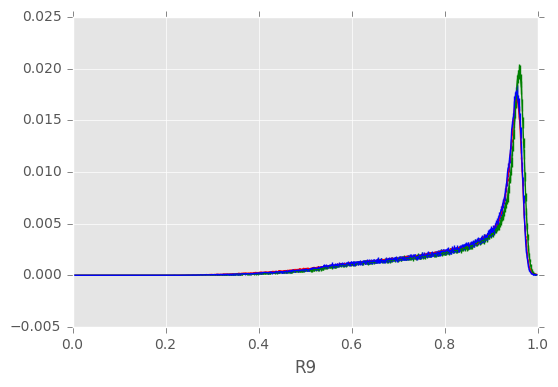

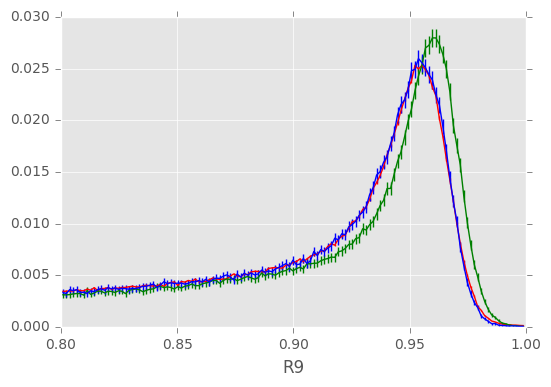

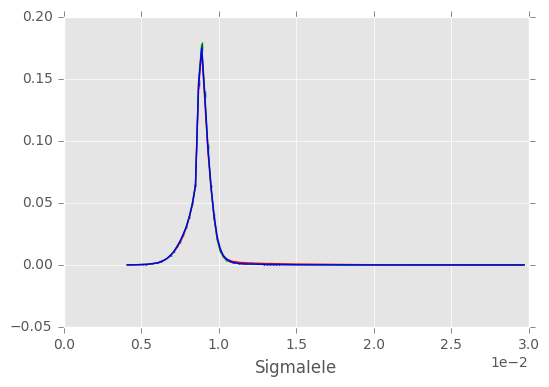

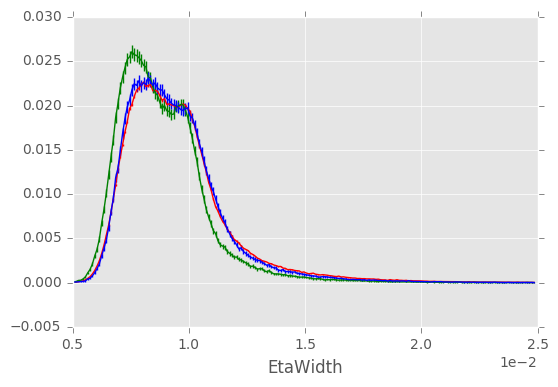

In [9]:
# All periods + integrated + EB
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Integrated_"+sec
section= "section1"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    fig = plt.figure(dpi=400)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


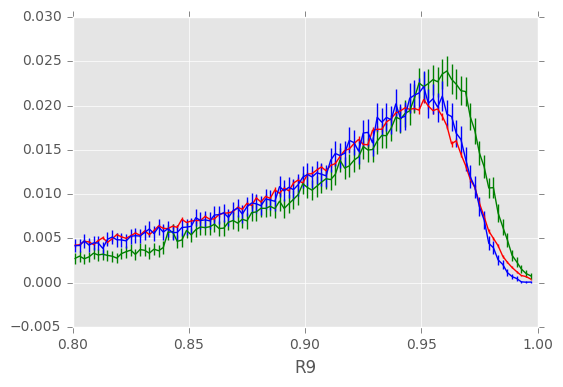

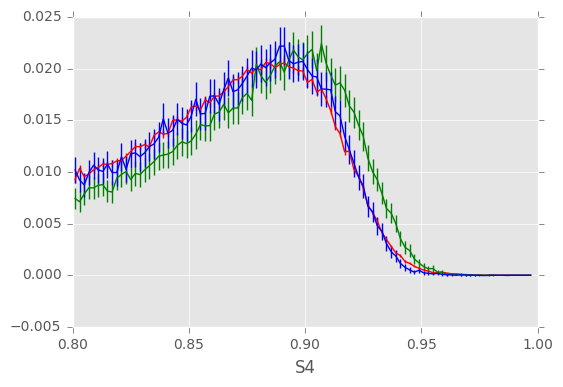

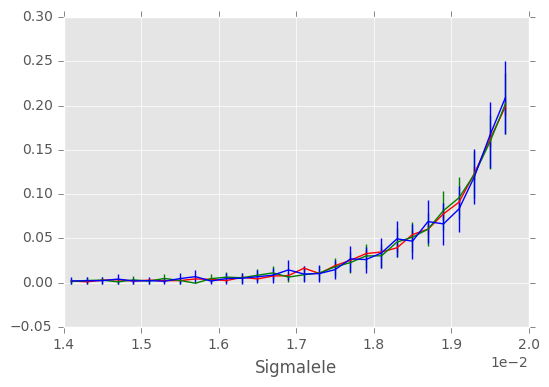

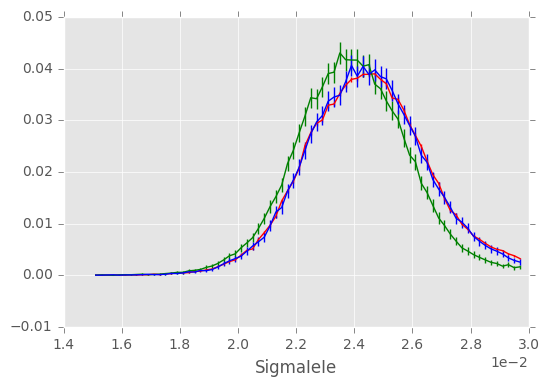

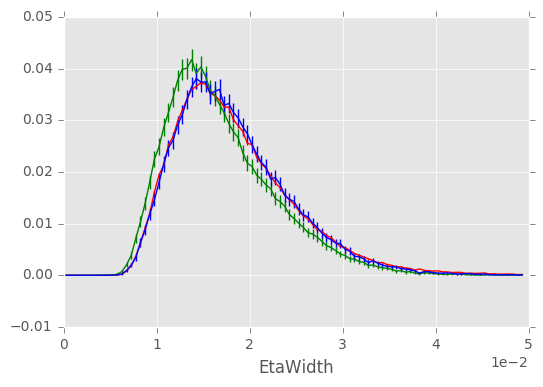

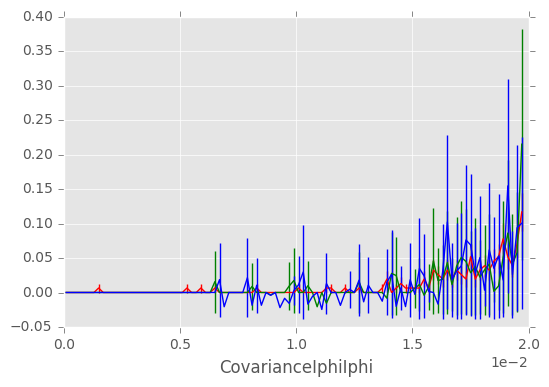

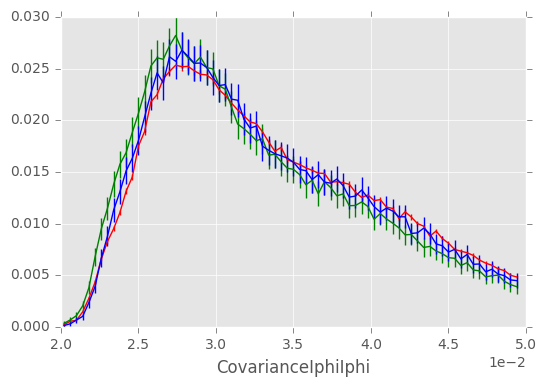

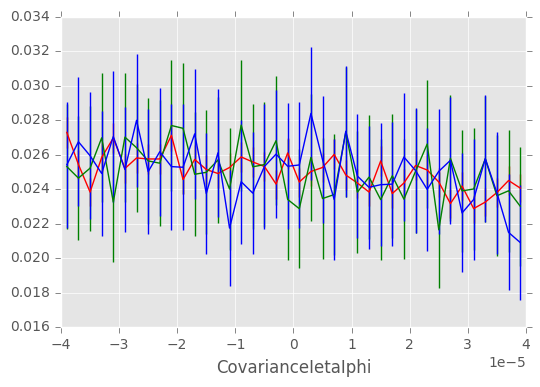

In [10]:
# All periods + integrated + EE
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Integrated_"+sec
section= "section2"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


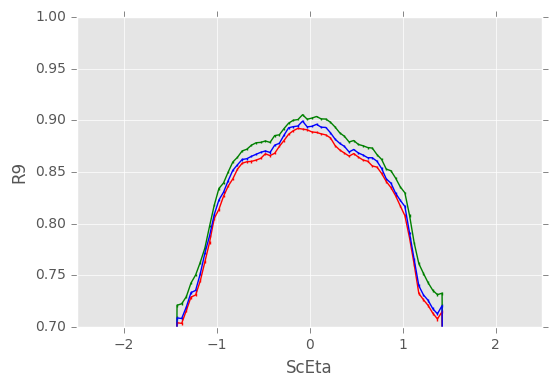

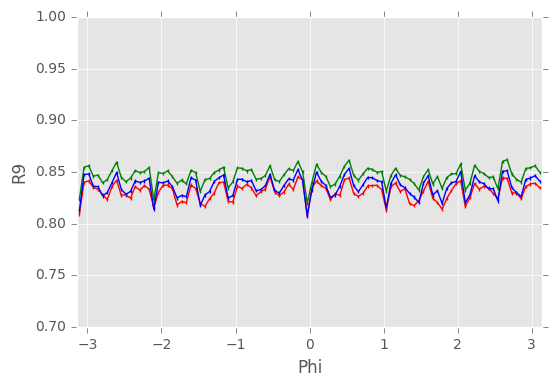

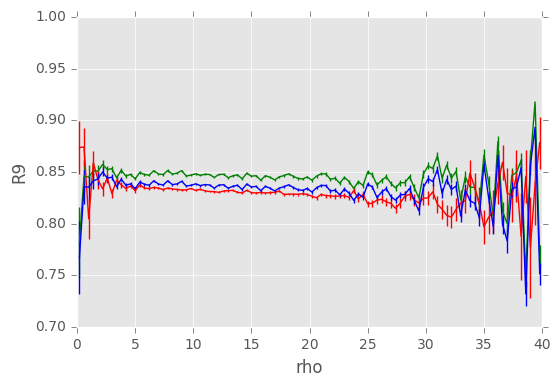

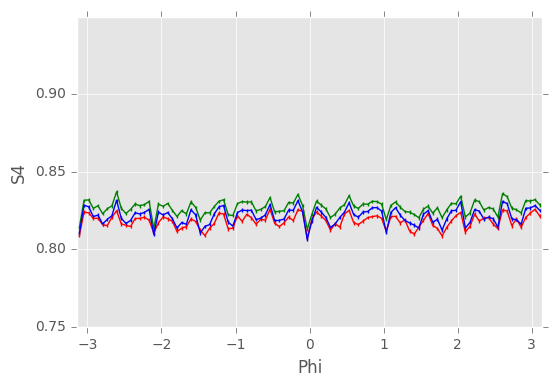

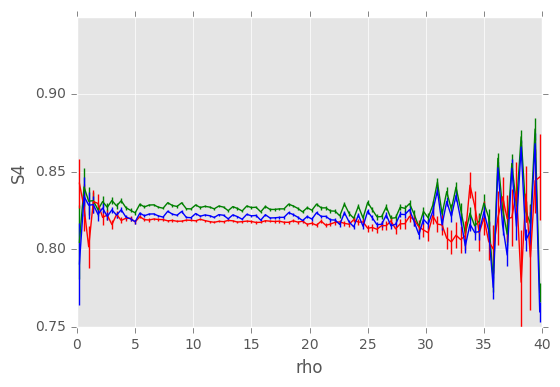

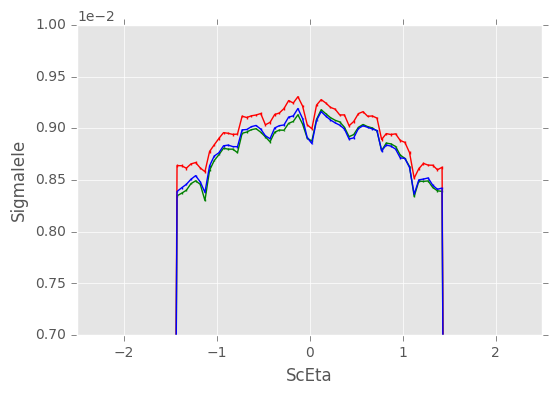

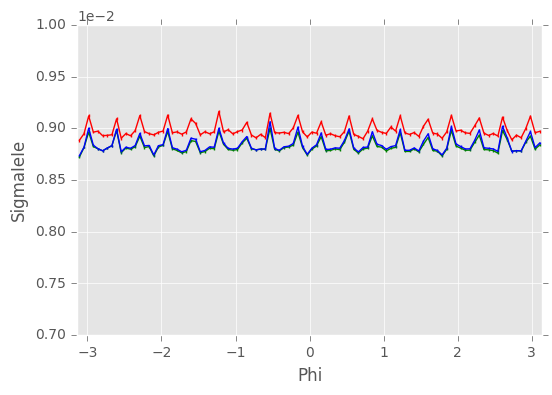

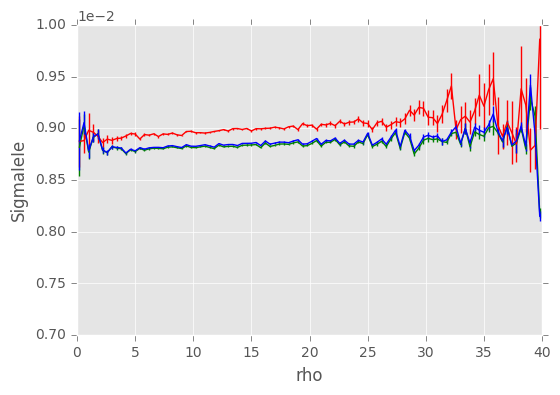

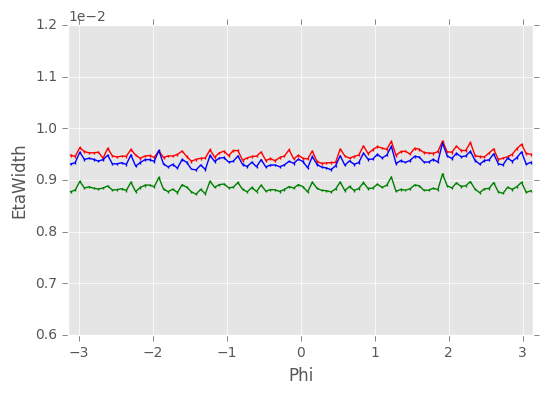

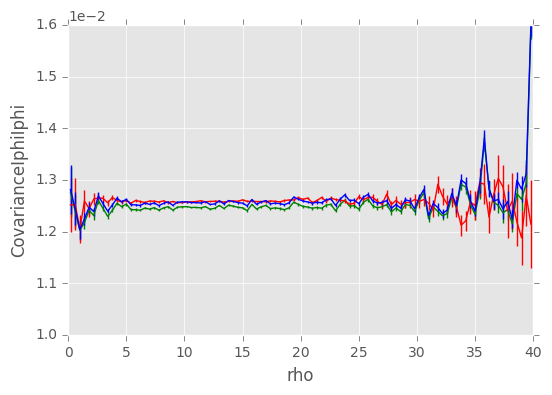

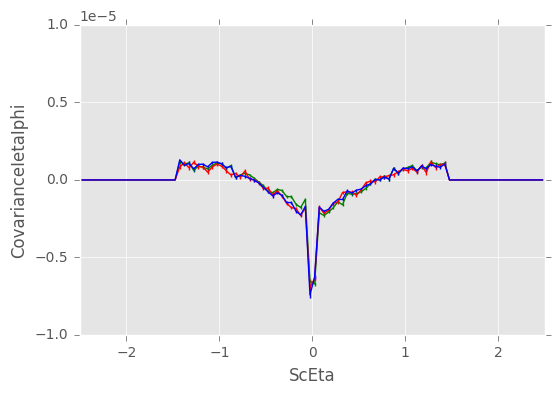

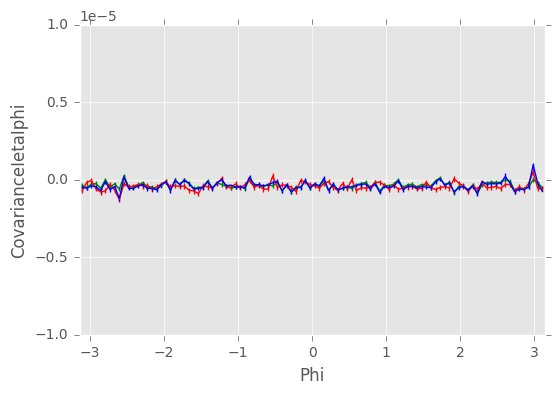

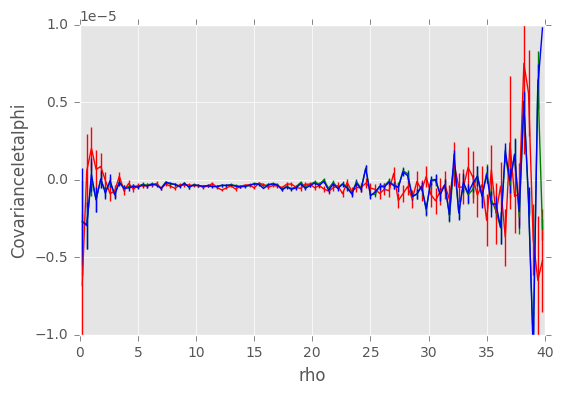

In [11]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


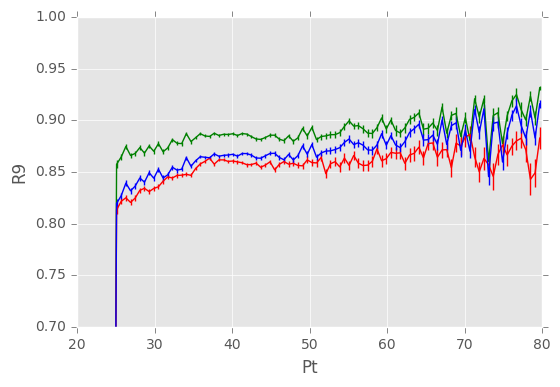

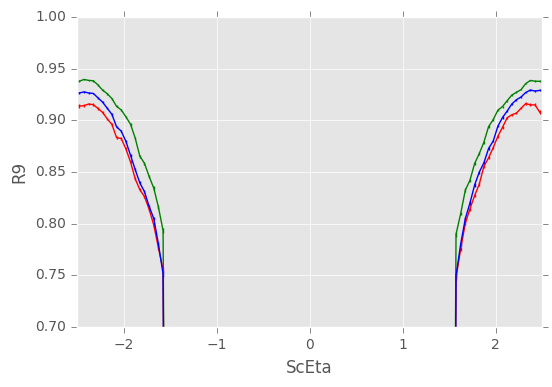

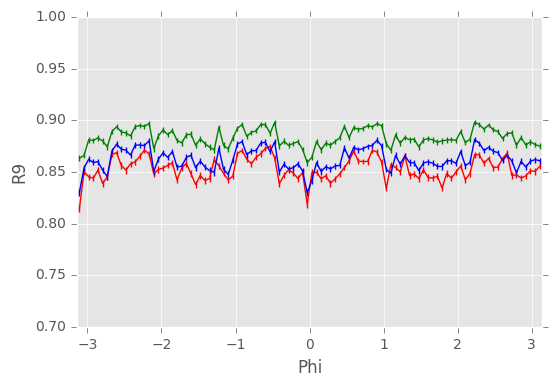

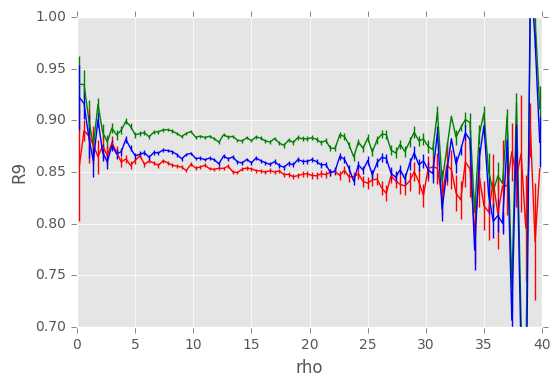

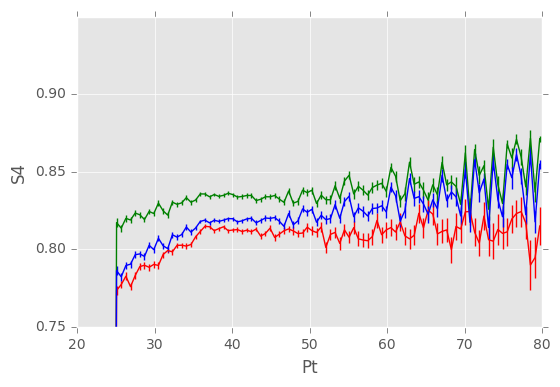

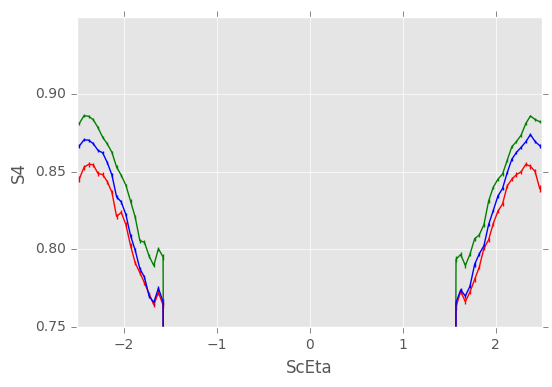

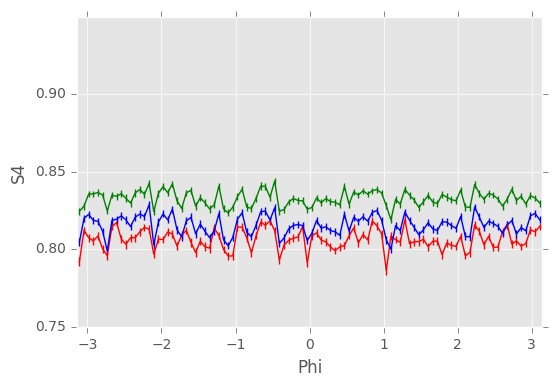

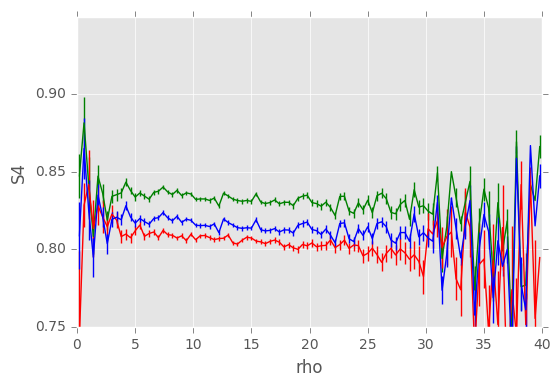

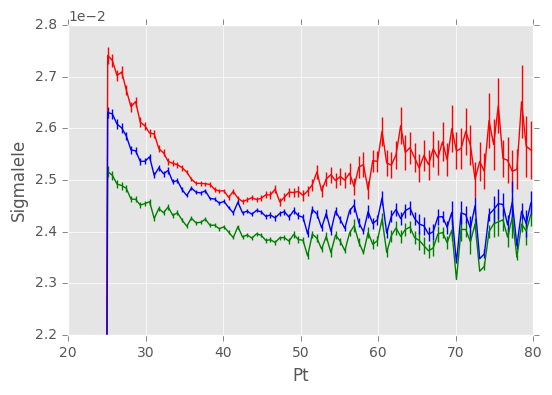

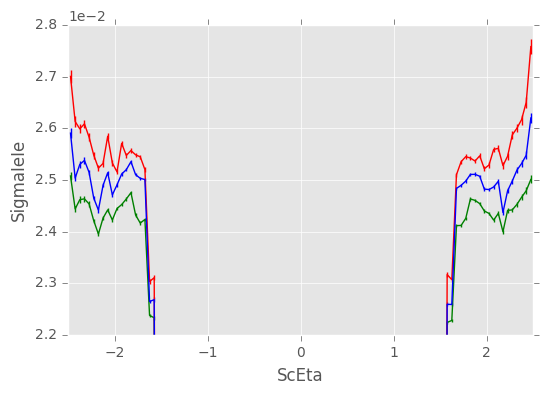

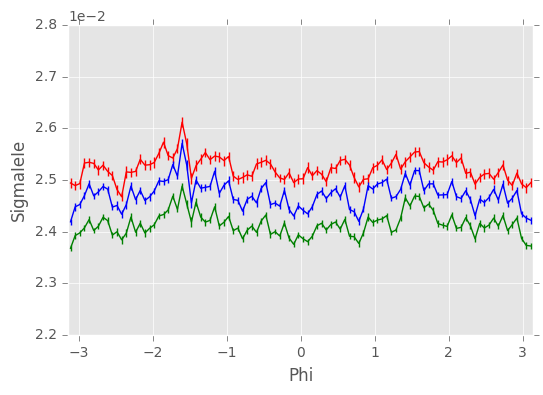

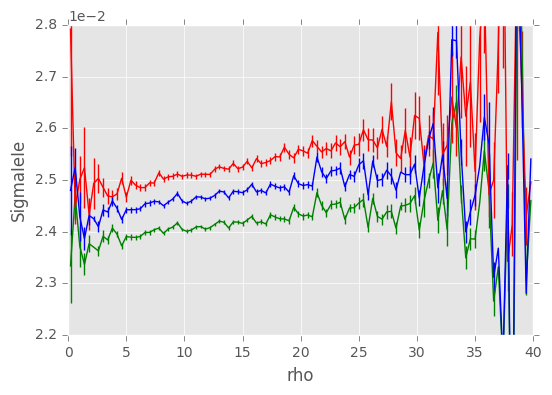

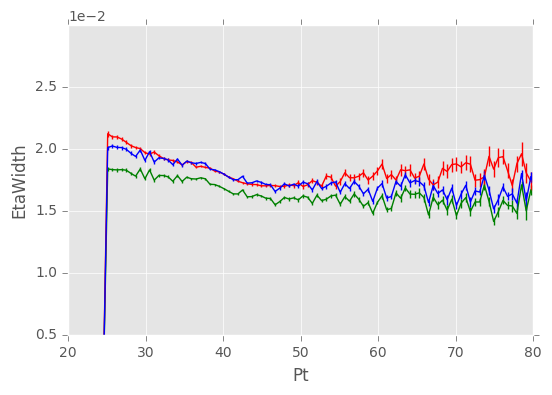

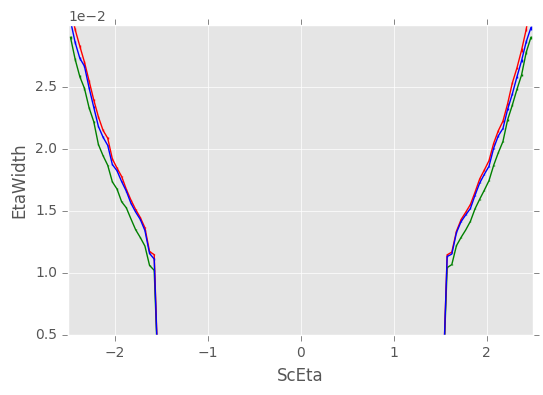

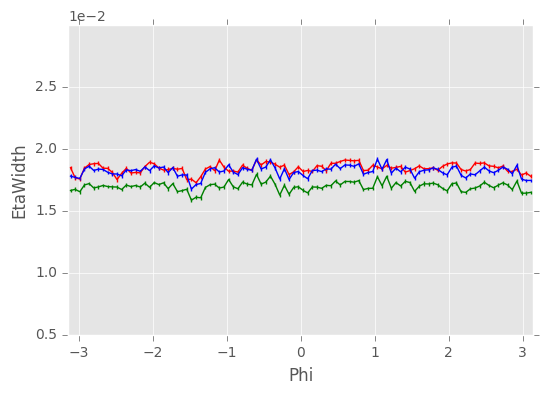

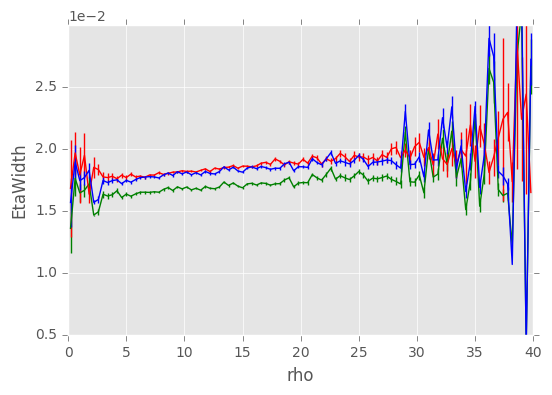

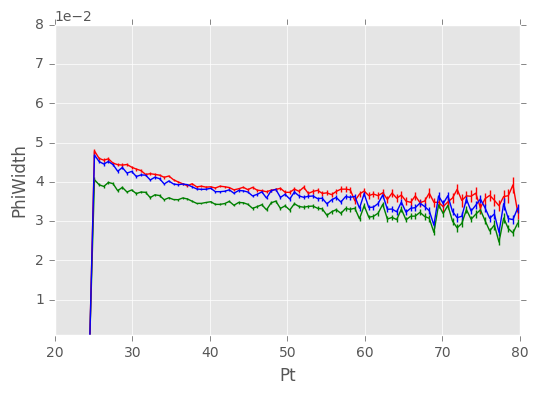

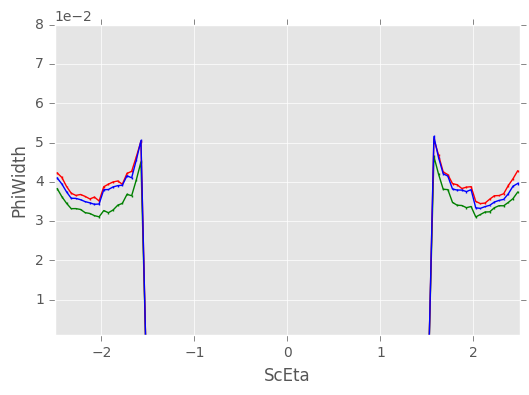

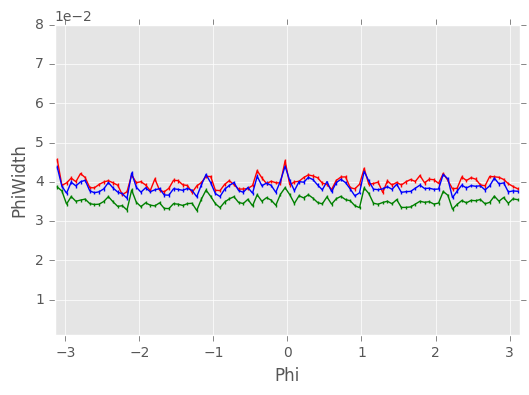

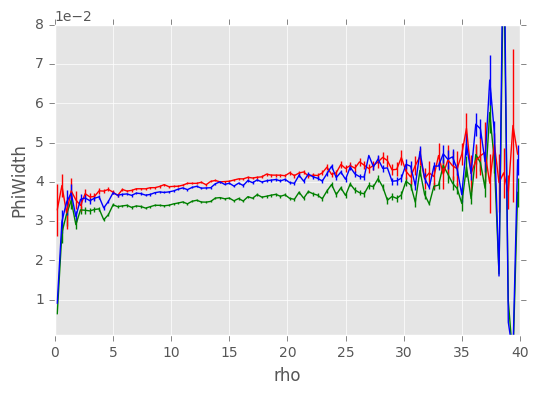

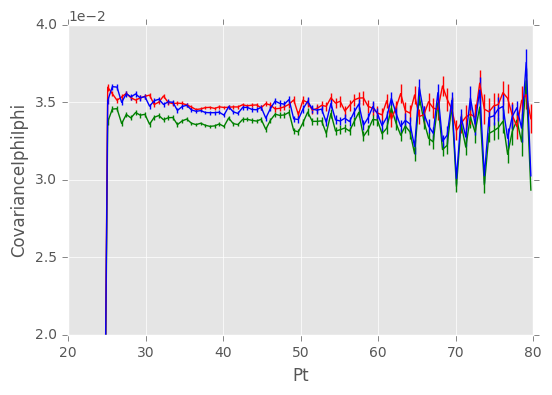

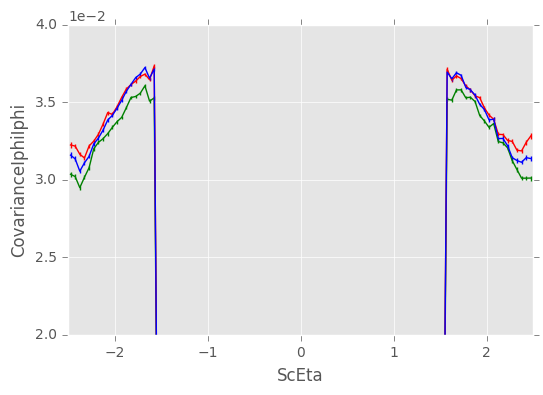

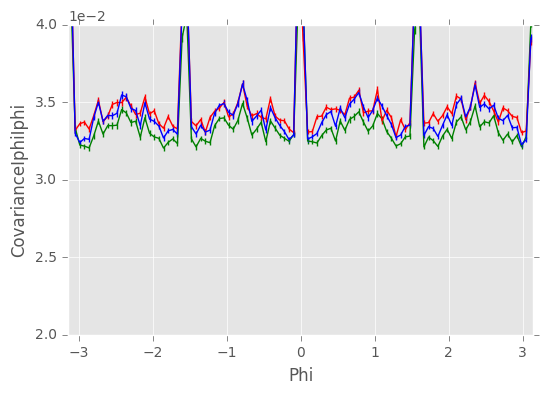

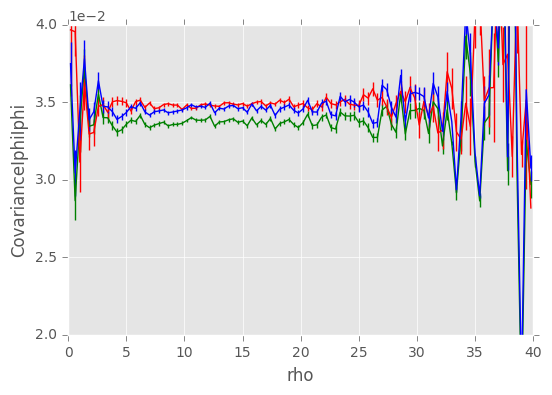

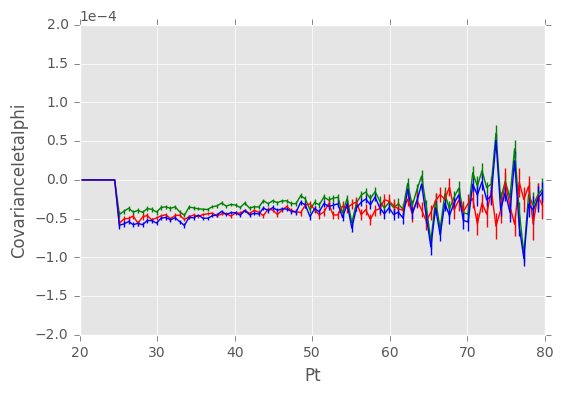

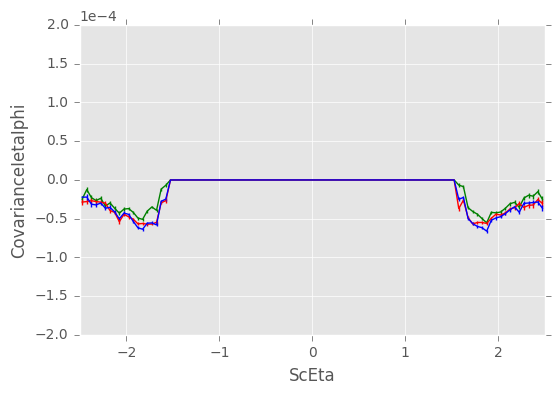

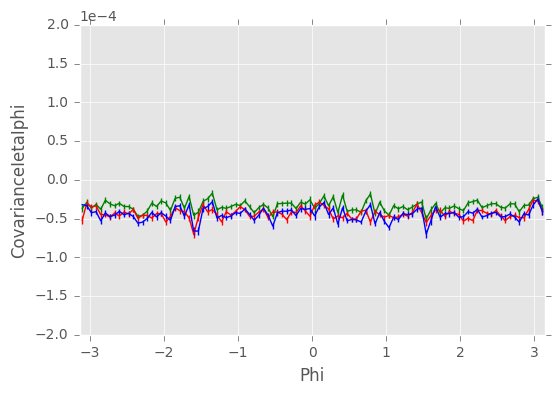

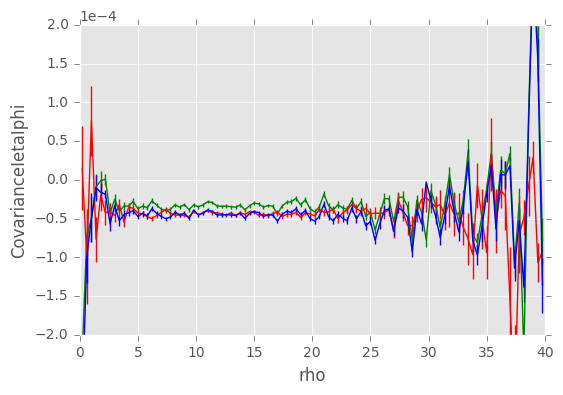

In [12]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section4"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.015
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

In [13]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
         ("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ) ]# ,
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
#("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [14]:
n_jobs=20
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2)
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True)
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   30.0s
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   32.3s remaining:  3.0min
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:   32.8s remaining:  1.6min
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:   35.2s remaining:  1.1min
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:   36.0s remaining:   44.0s
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:   37.7s remaining:   30.8s
[Parallel(n_jobs=20)]: Done  13 out of  20 | elapsed:   39.6s remaining:   21.3s
[Parallel(n_jobs=20)]: Done  15 out of  20 | elapsed:   43.4s remaining:   14.5s
[Parallel(n_jobs=20)]: Done  17 out of  20 | elapsed:   45.6s remaining:    8.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   46.9s finished


CPU times: user 630 ms, sys: 684 ms, total: 1.31 s
Wall time: 47.6 s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   22.8s
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:   23.2s remaining:  3.7min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:   23.9s remaining:  1.7min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:   24.0s remaining:   60.0s
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:   24.2s remaining:   39.4s
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:   25.4s remaining:   27.9s
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:   27.8s remaining:   20.9s
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:   30.4s remaining:   15.2s
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:   32.5s remaining:   10.2s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:   34.4s remaining:    5.7s


Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:   35.3s finished
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   22.4s
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:   23.8s remaining:  3.8min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:   24.2s remaining:  1.7min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:   25.1s remaining:  1.0min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:   25.9s remaining:   42.1s
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:   26.4s remaining:   29.0s
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:   27.7s remaining:   20.8s
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:   31.1s remaining:   15.5s
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:   31.9s remaining:   10.0s
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:   32.5s remaining:    5.4s


CPU times: user 1.43 s, sys: 1.67 s, total: 3.11 s
Wall time: 1min 11s


[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:   35.4s finished


In [15]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


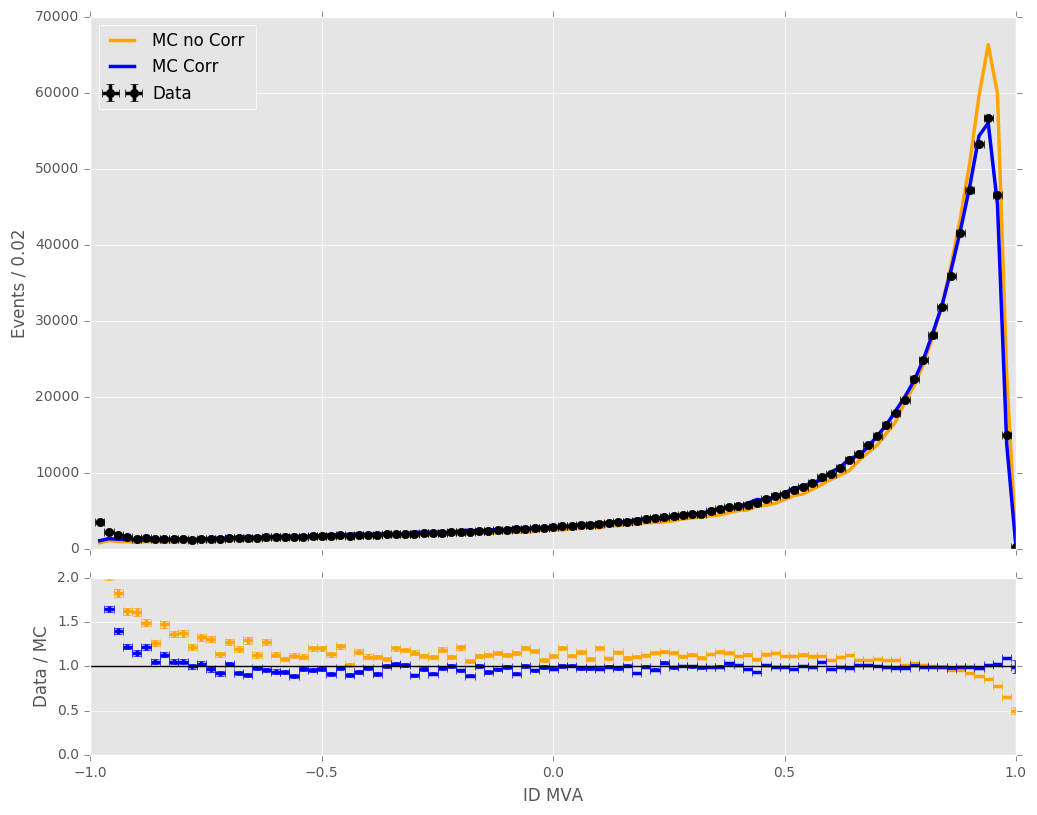

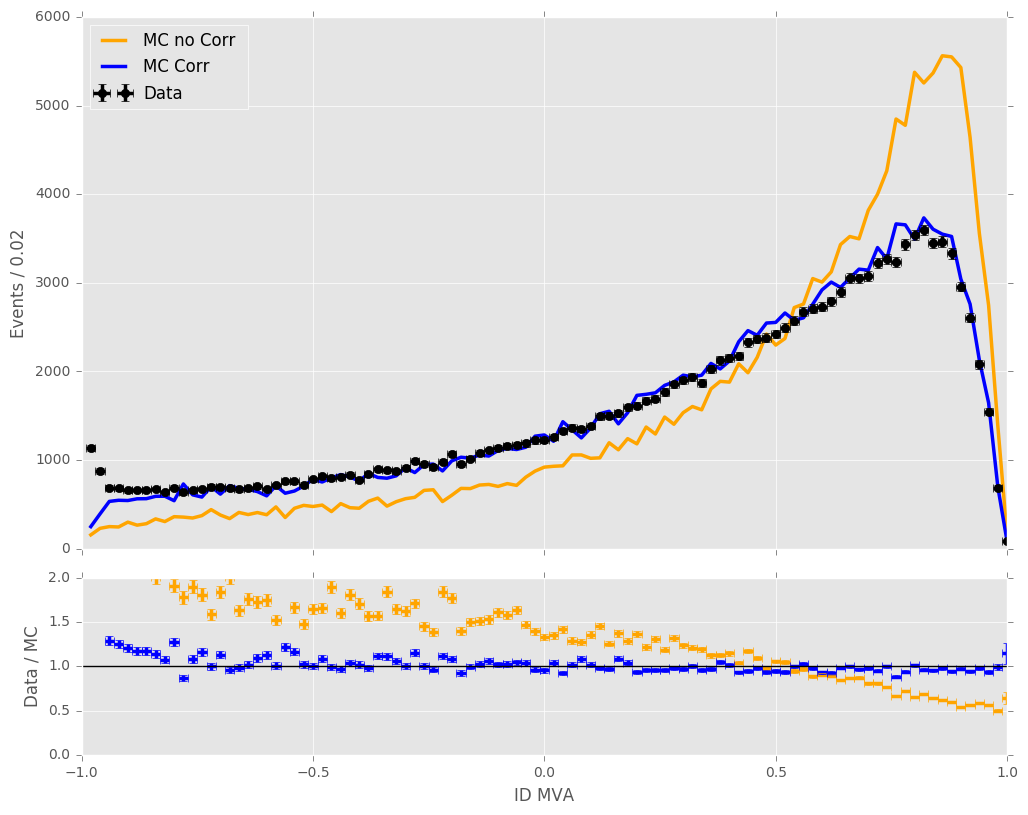

In [16]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [17]:
import matplotlib as mpl
from functools import reduce
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [18]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

/swshare/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


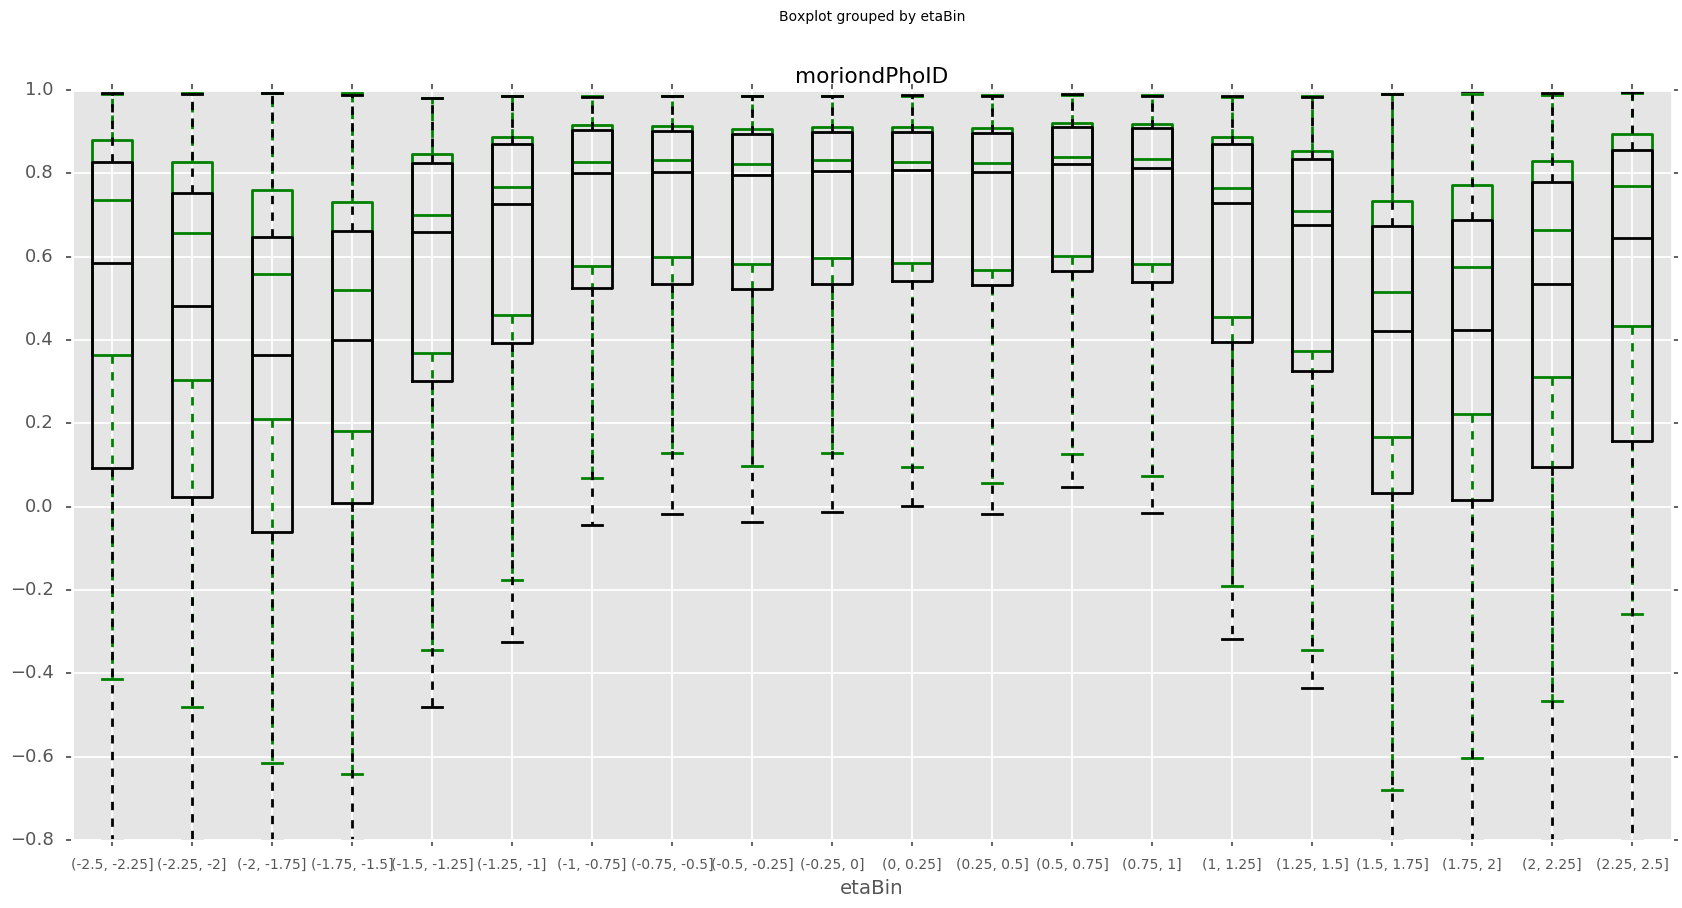

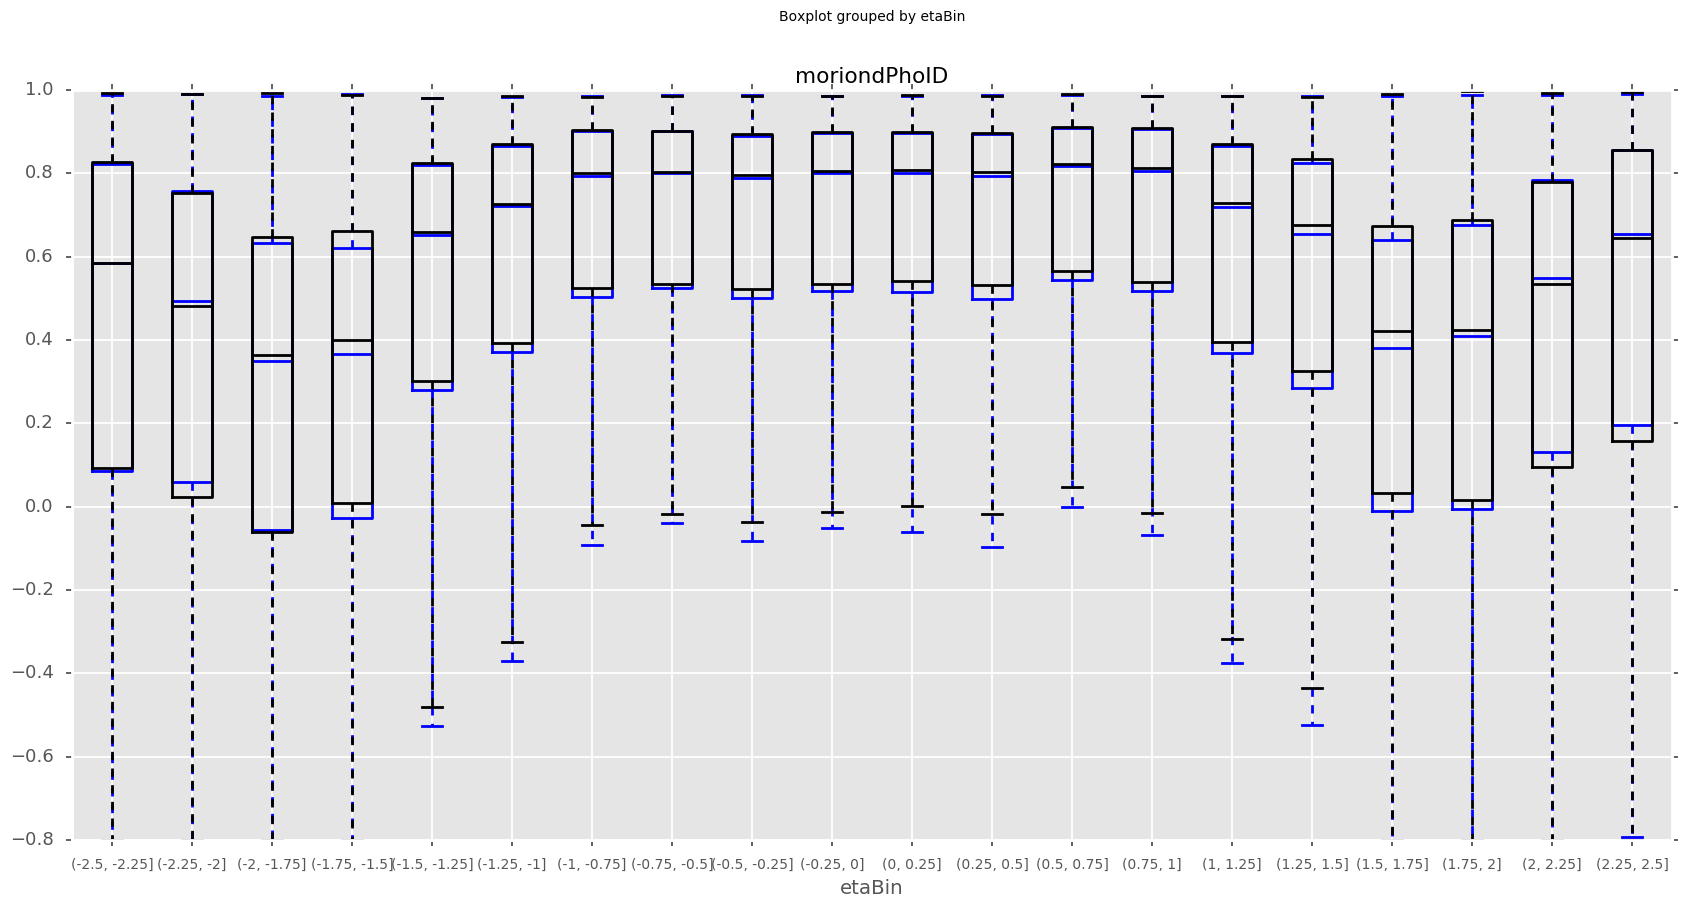

In [19]:
%matplotlib inline
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrShowerShapes', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig.show()

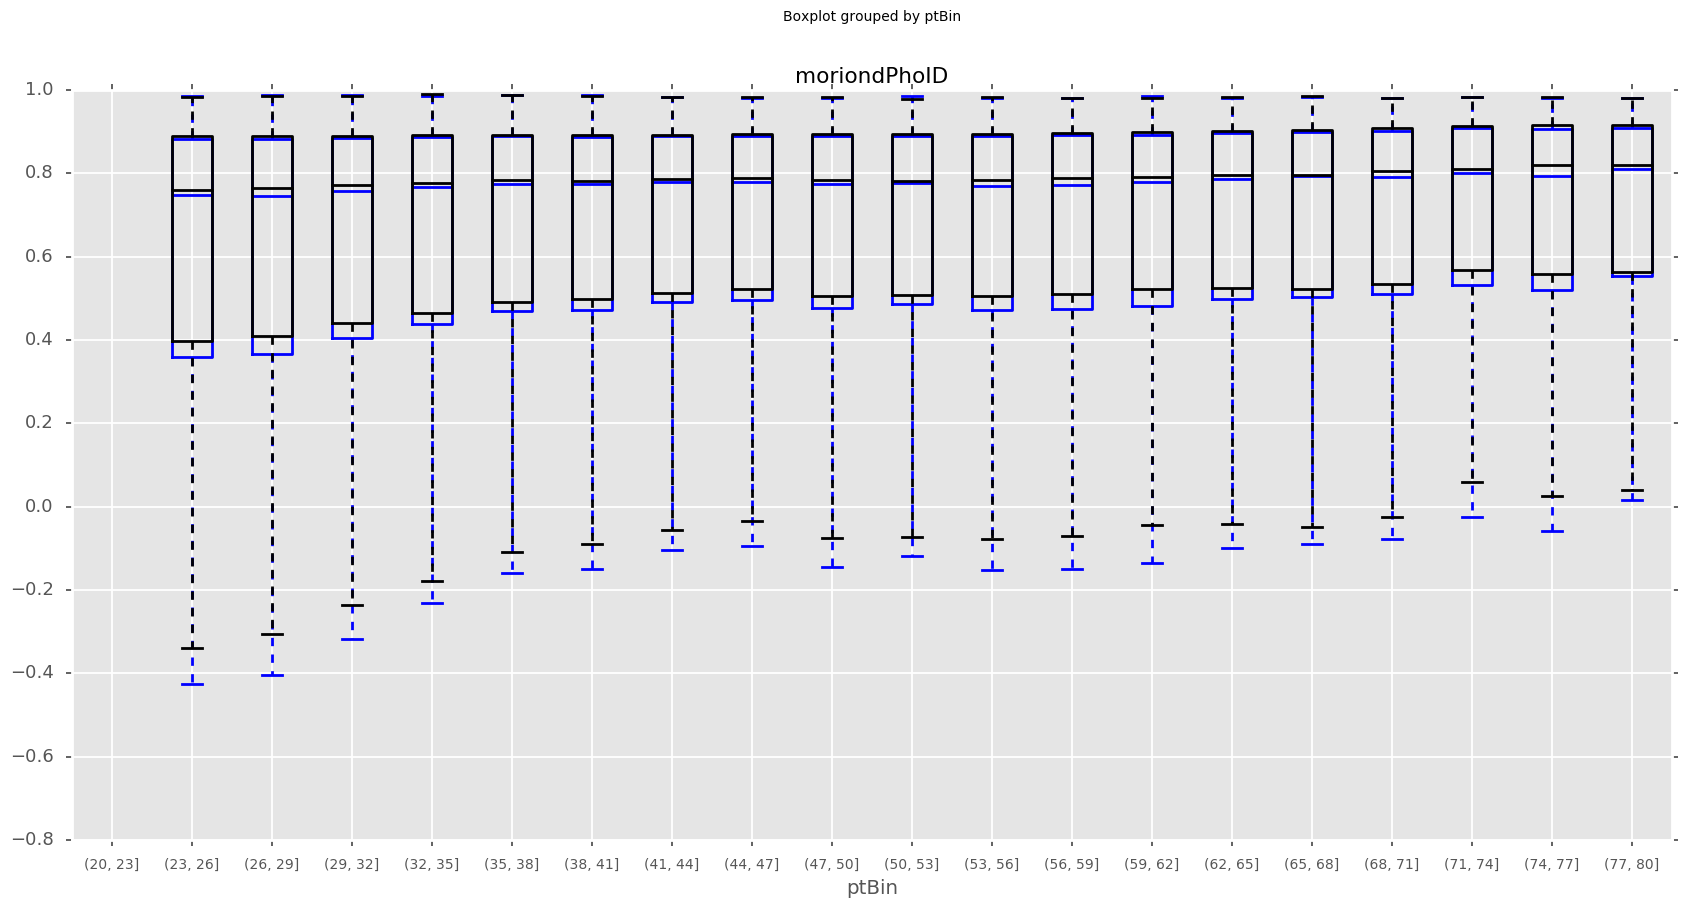

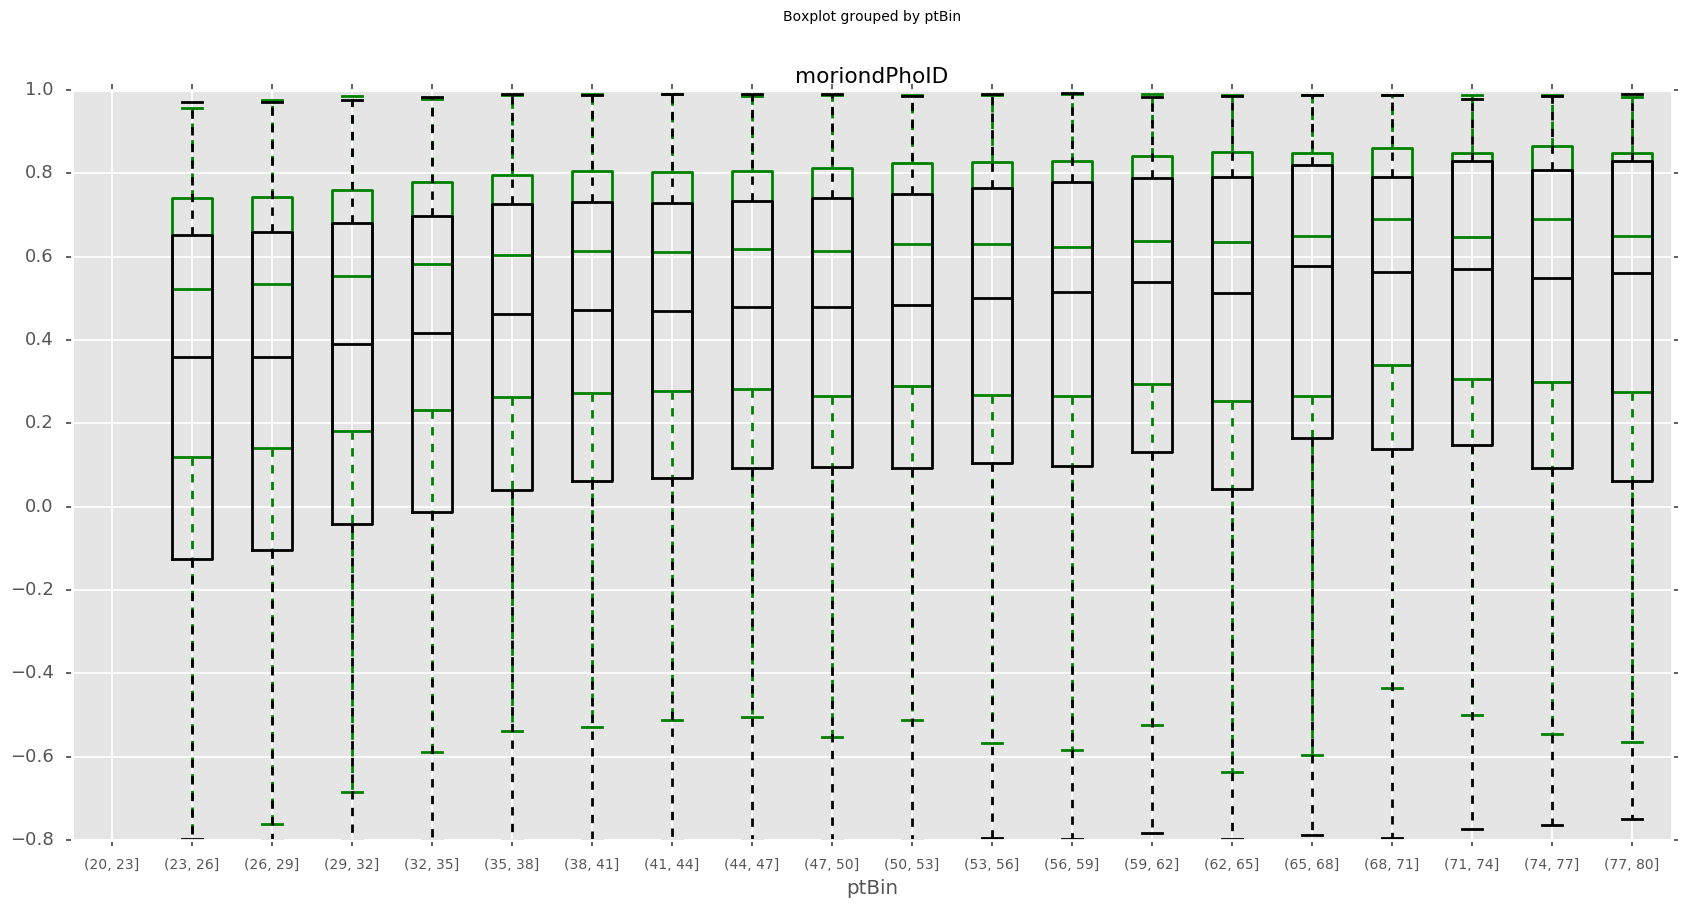

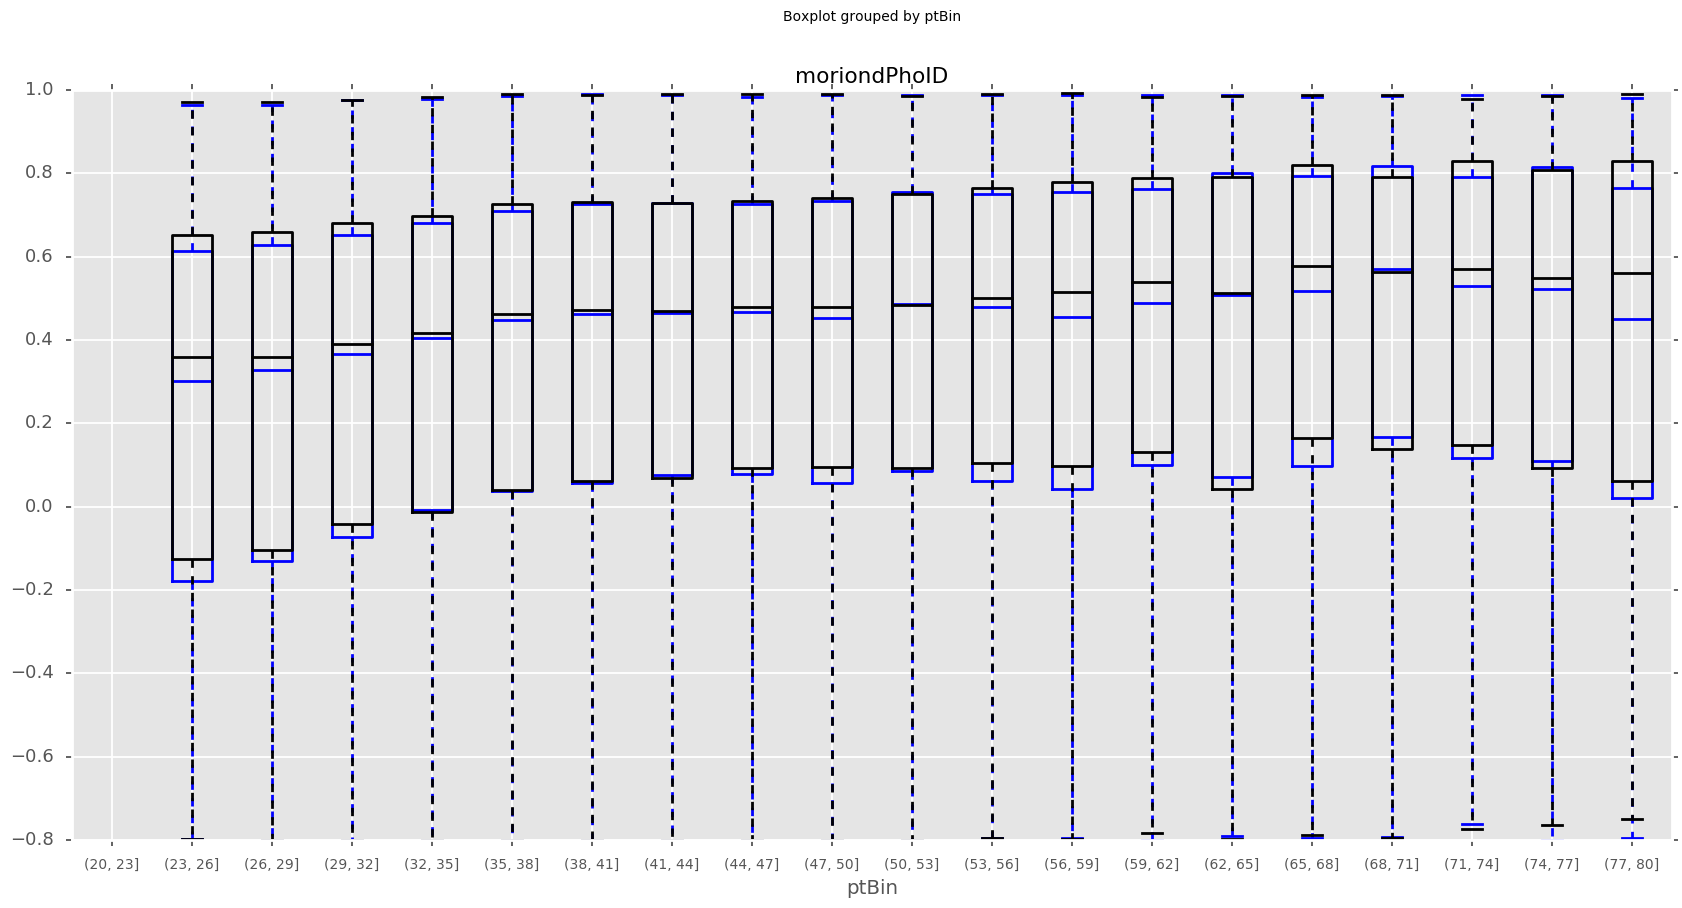

In [20]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')

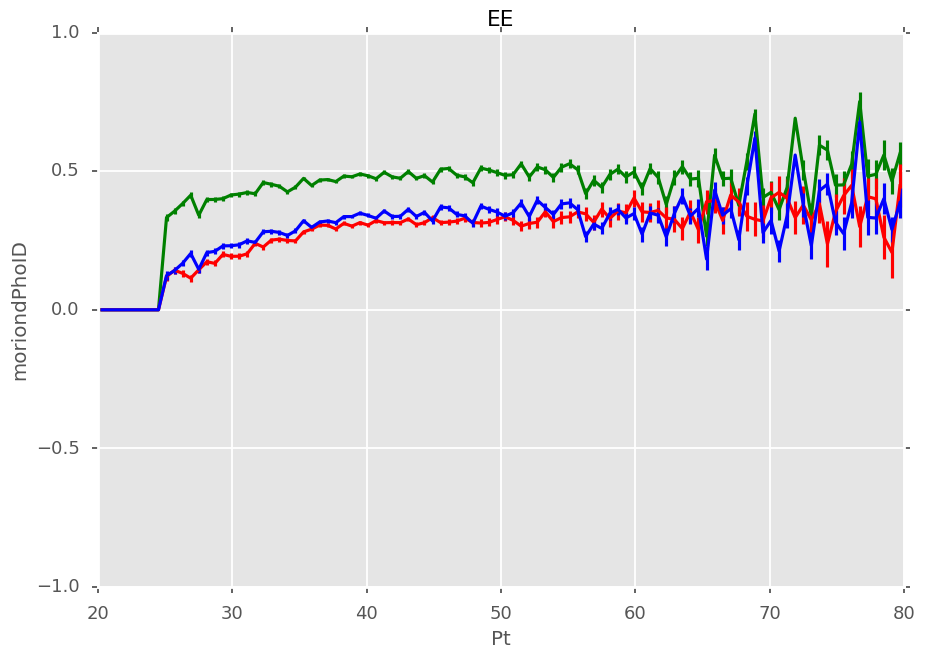

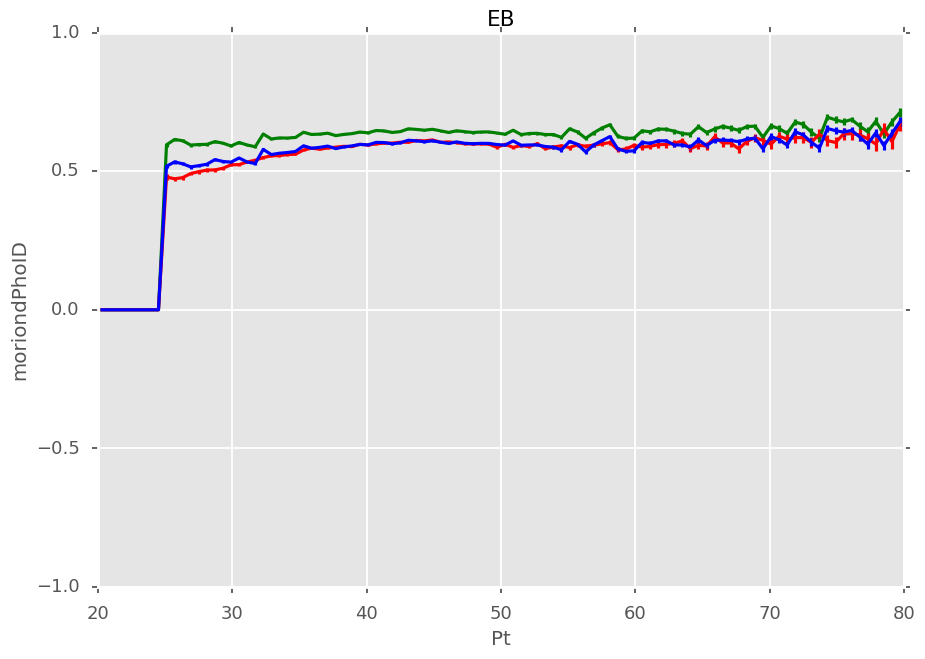

In [21]:
dfm=dfmcEE
dfd=dfEE
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EE")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EB")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])